(300, 2)
(100, 2)
(300, 1)
(100, 1)


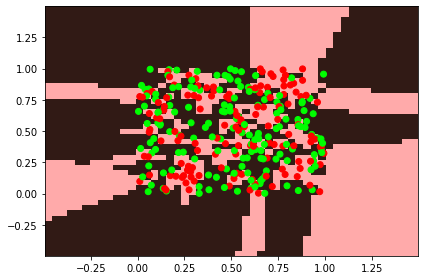

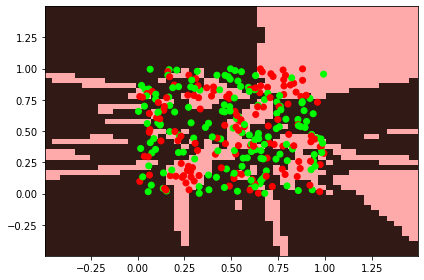

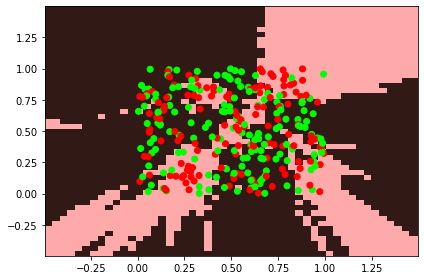

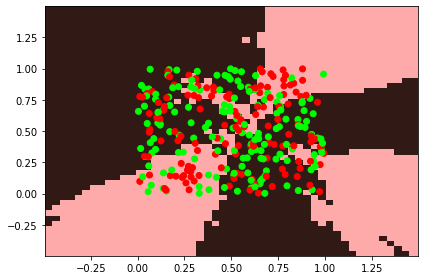

In [3]:
import pandas as pd
import os
import sys
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import numpy as np
# %matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def three():

    np.set_printoptions(threshold=sys.maxsize)

    features_dataset=pd.read_csv("hw1boundary_features.csv",header=None)
    features_dataset
    label_dataset=pd.read_csv("hw1boundary_labels.csv",header=None)

    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test =train_test_split(features_dataset,label_dataset, random_state=1)
    print(X_train.shape)
    print(X_test.shape)
    # print the shapes of the new y objects
    print(y_train.shape)
    print(y_test.shape)

    from sklearn.preprocessing import LabelEncoder

    #creating labelEncoder
    le = preprocessing.LabelEncoder()
    # Converting string labels into numbers.
    y_train = le.fit_transform(y_train.values.ravel())

    y_test = le.fit_transform(y_test.values.ravel())

    cmap_light = ListedColormap(['#311A15', '#AAAAFF','#FFAAAA'])
    cmap_bold = ListedColormap(['#00FF00', '#0000FF','#FF0000'])

    neighbors=[1,5,15,25]

    for k in neighbors:
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
    #   predict=knn.predict(X_test)

        x_min, x_max = X_train.loc[:, 0].min() - .5, X_train.loc[:, 0].max() + .5
        y_min, y_max = X_train.loc[:, 1].min() - .5, X_train.loc[:, 1].max() + .5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                           np.linspace(y_min, y_max, 50))

        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


        # print(y_train)
        # # Plot also the training points
        plt.scatter(X_train.loc[:, 0], X_train.loc[:, 1], c=y_train, cmap=cmap_bold)
        plt.tight_layout()

    plt.show()

three()